<a href="https://colab.research.google.com/github/Amanuel94/kaggle/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [19]:
split = ["train[:90%]","test", "train[90%:]"]
dataset, info = tfds.load("mnist", as_supervised = True, split = split, with_info = True)

In [24]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [142]:
train_ds, val_ds, test_ds = dataset

In [143]:
print(f'train size: {train_ds.cardinality().numpy()}')
print(f'val size: {val_ds.cardinality().numpy()}')
print(f'test size: {test_ds.cardinality().numpy()}')


train size: 54000
val size: 10000
test size: 6000


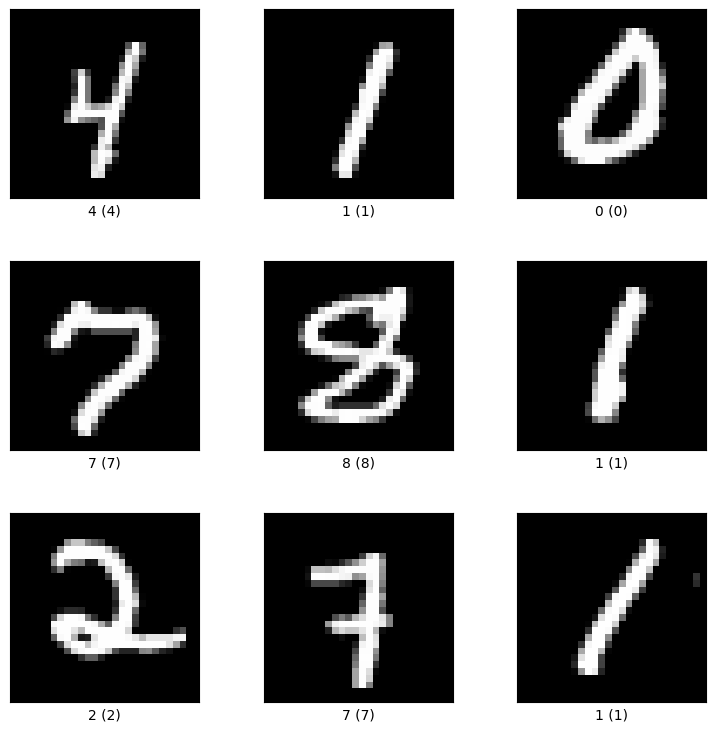

In [23]:
fig = tfds.show_examples(train_ds, info)

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 3, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 20, activation = "selu", kernel_initializer = "lecun_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 28, 5)         50        
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 8)         368       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 27, 27, 8)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_47 (Ba  (None, 27, 27, 8)         32        
 tchNormalization)                                               
                                                                 
 flatten_4 (Flatten)         (None, 5832)              0         
                                                                 
 dense_40 (Dense)            (None, 20)              

In [85]:
model.compile(
    optimizer = "Adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [86]:
n_batch = 32
batched_train_ds = train_ds.batch(n_batch).prefetch(1)
batched_val_ds = val_ds.batch(n_batch).prefetch(1)
batched_test_ds = test_ds.batch(n_batch).prefetch(1)
early_stopping_cb  = tf.keras.callbacks.EarlyStopping(patience = 10)
model.fit(batched_train_ds, validation_data = batched_val_ds, epochs = 50, callbacks = [early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 19s 10ms/step - loss: 0.1482 - accuracy: 0.9607 - val_loss: 0.0660 - val_accuracy: 0.9803
Epoch 2/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0588 - accuracy: 0.9832 - val_loss: 0.0721 - val_accuracy: 0.9772
Epoch 3/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0396 - accuracy: 0.9891 - val_loss: 0.0650 - val_accuracy: 0.9800
Epoch 4/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0258 - accuracy: 0.9930 - val_loss: 0.0984 - val_accuracy: 0.9723
Epoch 5/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0705 - val_accuracy: 0.9805
Epoch 6/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0748 - val_accuracy: 0.9817
Epoch 7/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.0733 -

In [87]:
model.evaluate(batched_test_ds)

188/188 [==============================] - 1s 5ms/step - loss: 0.1147 - accuracy: 0.9788


[0.11473148316144943, 0.9788333177566528]

In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 3, strides = 2, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 3, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 1),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 1, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 20, activation = "selu", kernel_initializer = "lecun_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units = 20, activation = "selu", kernel_initializer = "lecun_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(
    optimizer = "Adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

batched_train_ds = train_ds.batch(n_batch).prefetch(1)
batched_val_ds = val_ds.batch(n_batch).prefetch(1)
batched_test_ds = test_ds.batch(n_batch).prefetch(1)

early_stopping_cb  = tf.keras.callbacks.EarlyStopping(patience = 10)
model.fit(batched_train_ds, validation_data = batched_val_ds, epochs = 50, callbacks = [early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 16s 8ms/step - loss: 0.2560 - accuracy: 0.9275 - val_loss: 0.1029 - val_accuracy: 0.9671
Epoch 2/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1018 - accuracy: 0.9693 - val_loss: 0.0729 - val_accuracy: 0.9766
Epoch 3/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0810 - accuracy: 0.9757 - val_loss: 0.0682 - val_accuracy: 0.9784
Epoch 4/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0676 - accuracy: 0.9799 - val_loss: 0.0712 - val_accuracy: 0.9777
Epoch 5/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0578 - accuracy: 0.9830 - val_loss: 0.0801 - val_accuracy: 0.9745
Epoch 6/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0507 - accuracy: 0.9852 - val_loss: 0.0746 - val_accuracy: 0.9783
Epoch 7/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0446 - accuracy: 0.9866 - val_loss: 0.0696 - val_ac

In [83]:
model.evaluate(batched_test_ds)

188/188 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9757


[0.09233127534389496, 0.9756666421890259]

In [179]:
dataAugmenter = tf.keras.models.Sequential([
    tf.keras.layers.RandomZoom(
        height_factor=(-0.05, -0.15),
        width_factor=(-0.05, -0.15)),
])

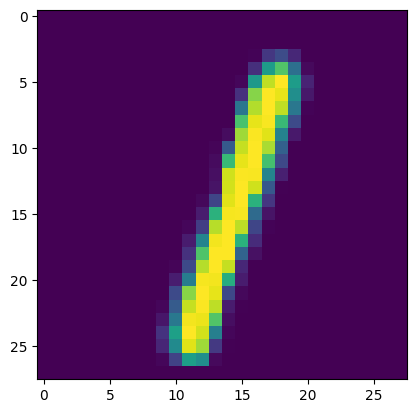

In [182]:
for image, label in train_ds.take(2):
  image = dataAugmenter(image)
  plt.imshow(image[:, :, 0])

In [183]:
cast_train_ds = train_ds.map(lambda x, y : ((tf.cast(x, tf.float32)), y), num_parallel_calls=tf.data.AUTOTUNE)
aug_ds = cast_train_ds.map(lambda x, y : (dataAugmenter(x), y), num_parallel_calls=tf.data.AUTOTUNE)
final_train_ds = cast_train_ds.concatenate(aug_ds).shuffle(1000)

In [184]:
final_train_ds.cardinality().numpy()

108000

In [186]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 3, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 1, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 20, activation = "selu", kernel_initializer = "lecun_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(
    optimizer = "Adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

batched_train_ds = final_train_ds.batch(n_batch).prefetch(1)
batched_val_ds = val_ds.batch(n_batch).prefetch(1)
batched_test_ds = test_ds.batch(n_batch).prefetch(1)

early_stopping_cb  = tf.keras.callbacks.EarlyStopping(patience = 10)
model.fit(batched_train_ds, validation_data = batched_val_ds, epochs = 50, callbacks = [early_stopping_cb])

Epoch 1/50
3375/3375 [==============================] - 49s 14ms/step - loss: 0.1449 - accuracy: 0.9586 - val_loss: 0.3477 - val_accuracy: 0.8855
Epoch 2/50
3375/3375 [==============================] - 46s 14ms/step - loss: 0.0728 - accuracy: 0.9775 - val_loss: 0.1682 - val_accuracy: 0.9495
Epoch 3/50
3375/3375 [==============================] - 46s 14ms/step - loss: 0.0571 - accuracy: 0.9823 - val_loss: 0.1734 - val_accuracy: 0.9463
Epoch 4/50
3375/3375 [==============================] - 46s 14ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.2057 - val_accuracy: 0.9385
Epoch 5/50
3375/3375 [==============================] - 46s 14ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.1539 - val_accuracy: 0.9555
Epoch 6/50
3375/3375 [==============================] - 47s 14ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.1199 - val_accuracy: 0.9647
Epoch 7/50
3375/3375 [==============================] - 46s 14ms/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.1246 -

In [187]:
model.evaluate(batched_test_ds)

188/188 [==============================] - 1s 6ms/step - loss: 0.1996 - accuracy: 0.9588


[0.19960233569145203, 0.9588333368301392]

In [164]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 3, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(filters = 5, kernel_size = 1, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 20, activation = "selu", kernel_initializer = "lecun_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(
    optimizer = "Adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

batched_train_ds = final_train_ds.batch(n_batch).prefetch(1)
batched_val_ds = val_ds.batch(n_batch).prefetch(1)
batched_test_ds = test_ds.batch(n_batch).prefetch(1)

early_stopping_cb  = tf.keras.callbacks.EarlyStopping(patience = 10)
model.fit(batched_train_ds, validation_data = batched_val_ds, epochs = 50, callbacks = [early_stopping_cb])

Epoch 1/50
3375/3375 [==============================] - 36s 10ms/step - loss: 0.1954 - accuracy: 0.9435 - val_loss: 0.2178 - val_accuracy: 0.9357
Epoch 2/50
3375/3375 [==============================] - 35s 10ms/step - loss: 0.1185 - accuracy: 0.9638 - val_loss: 0.2334 - val_accuracy: 0.9350
Epoch 3/50
3375/3375 [==============================] - 35s 10ms/step - loss: 0.1007 - accuracy: 0.9691 - val_loss: 0.1790 - val_accuracy: 0.9508
Epoch 4/50
3375/3375 [==============================] - 36s 11ms/step - loss: 0.0896 - accuracy: 0.9722 - val_loss: 0.1779 - val_accuracy: 0.9532
Epoch 5/50
3375/3375 [==============================] - 36s 11ms/step - loss: 0.0811 - accuracy: 0.9760 - val_loss: 0.1675 - val_accuracy: 0.9528
Epoch 6/50
3375/3375 [==============================] - 35s 10ms/step - loss: 0.0760 - accuracy: 0.9768 - val_loss: 0.1391 - val_accuracy: 0.9590
Epoch 7/50
3375/3375 [==============================] - 35s 10ms/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.1276 -

In [188]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 1, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 128, activation = "selu", kernel_initializer = "lecun_uniform"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(
    optimizer = "Adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

batched_train_ds = final_train_ds.batch(n_batch).prefetch(1)
batched_val_ds = val_ds.batch(n_batch).prefetch(1)
batched_test_ds = test_ds.batch(n_batch).prefetch(1)

early_stopping_cb  = tf.keras.callbacks.EarlyStopping(patience = 10)
model.fit(batched_train_ds, validation_data = batched_val_ds, epochs = 50, callbacks = [early_stopping_cb])

Epoch 1/50
3375/3375 [==============================] - 63s 18ms/step - loss: 0.1786 - accuracy: 0.9556 - val_loss: 0.0723 - val_accuracy: 0.9782
Epoch 2/50
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0721 - accuracy: 0.9791 - val_loss: 0.0799 - val_accuracy: 0.9766
Epoch 3/50
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0518 - val_accuracy: 0.9878
Epoch 4/50
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0564 - val_accuracy: 0.9889
Epoch 5/50
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0845 - val_accuracy: 0.9847
Epoch 6/50
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0646 - val_accuracy: 0.9874
Epoch 7/50
3375/3375 [==============================] - 61s 18ms/step - loss: 0.0267 - accuracy: 0.9920 - val_loss: 0.0707 -

In [189]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 1, strides = 1, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 128, activation = "selu", kernel_initializer = "lecun_uniform"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(
    optimizer = "Adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

batched_train_ds = train_ds.batch(n_batch).prefetch(1)
batched_val_ds = val_ds.batch(n_batch).prefetch(1)
batched_test_ds = test_ds.batch(n_batch).prefetch(1)

early_stopping_cb  = tf.keras.callbacks.EarlyStopping(patience = 10)
model.fit(batched_train_ds, validation_data = batched_val_ds, epochs = 50, callbacks = [early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 33s 19ms/step - loss: 0.2158 - accuracy: 0.9483 - val_loss: 0.0697 - val_accuracy: 0.9798
Epoch 2/50
1688/1688 [==============================] - 31s 19ms/step - loss: 0.0835 - accuracy: 0.9772 - val_loss: 0.0823 - val_accuracy: 0.9778
Epoch 3/50
1688/1688 [==============================] - 31s 19ms/step - loss: 0.0657 - accuracy: 0.9810 - val_loss: 0.0650 - val_accuracy: 0.9847
Epoch 4/50
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0485 - accuracy: 0.9861 - val_loss: 0.0925 - val_accuracy: 0.9801
Epoch 5/50
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.0805 - val_accuracy: 0.9860
Epoch 6/50
1688/1688 [==============================] - 31s 19ms/step - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.0670 - val_accuracy: 0.9852
Epoch 7/50
1688/1688 [==============================] - 31s 19ms/step - loss: 0.0308 - accuracy: 0.9911 - val_loss: 0.0763 -